In [1]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL of the iris dataset
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'

# Create a DataFrame from the dataset
iris = pd.read_csv(url)

In [4]:
# Get basic statistical summary of the dataset
print("\nSummary statistics:")
iris.describe()


Summary statistics:


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Compute pairwise correlations between numeric variables
print("\nCorrelation matrix:")
correlation_matrix = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()
correlation_matrix


Correlation matrix:


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


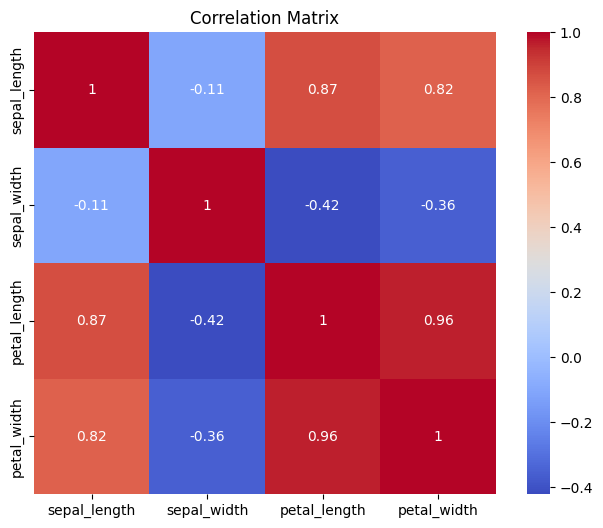

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

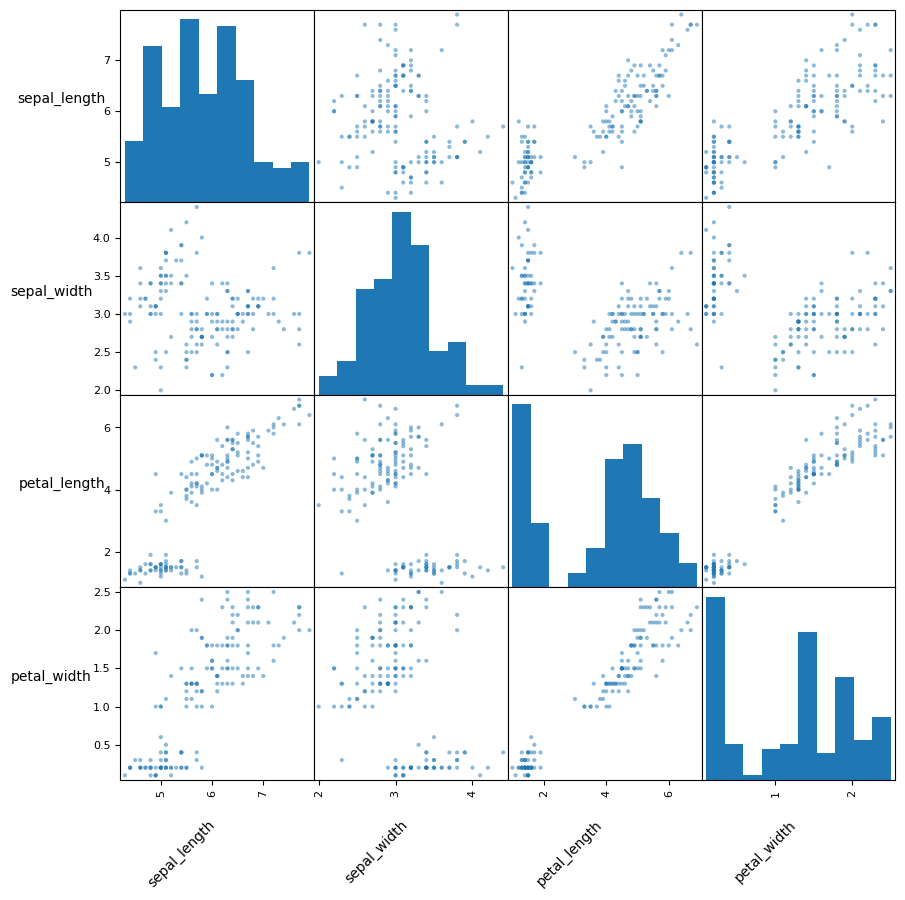

In [11]:
variables = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Create a scatter matrix
scatter_matrix = pd.plotting.scatter_matrix(iris[variables], figsize=(10, 10))

# Customize the scatter matrix plot
for ax in scatter_matrix.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.xaxis.label.set_ha('right')
    ax.yaxis.label.set_ha('center')
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 30

plt.show()

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS, add_constant

# X = add_constant(iris[['sepal_length', 'sepal_width', 'petal_length']])
X = iris[['sepal_length', 'sepal_width', 'petal_length']]

# Create the target variable
y = iris['petal_width']

# Fit a linear regression model
model = OLS(y, X).fit()

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
print(vif)

       Variable         VIF
0  sepal_length  204.766748
1   sepal_width   85.619529
2  petal_length   36.711712


In [2]:
X = iris[['sepal_length', 'sepal_width', 'petal_length']]
X = sm.add_constant(X)  # Add a constant term to the features
y = iris['petal_width']

# Fit the multivariate regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     736.9
Date:                Thu, 18 May 2023   Prob (F-statistic):           6.20e-88
Time:                        22:05:05   Log-Likelihood:                 36.809
No. Observations:                 150   AIC:                            -65.62
Df Residuals:                     146   BIC:                            -53.57
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.2487      0.178     -1.396   

# The must-knows

**Dep. Variable**: petal_width: The dependent variable (i.e., the outcome or response variable) is petal_width. The model is trying to predict this variable based on other variables.

**R-squared**: 0.938: The R-squared value (or coefficient of determination) indicates that 93.8% of the variation in petal_width can be explained by the independent variables (predictors) in the model. This is a measure of how well the model fits the data.

**Adj. R-squared: 0.937**: The adjusted R-squared is a modified version of R-squared that adjusts for the number of predictors in the model. It's 93.7% in this case, which is very close to the R-squared value indicating that most predictors are useful.

**Method: Least Squares**: The method used to fit the model is Ordinary Least Squares (OLS), which minimizes the sum of the squared residuals.

**F-statistic: 736.9**: The F-statistic is a measure of how significant the fit of the model is. It's calculated as the ratio of the mean regression sum of squares divided by the mean error sum of squares. A larger F-statistic indicates a more significant model.

**Prob (F-statistic): 6.20e-88**: This is the p-value associated with the F-statistic. A small p-value (generally, less than 0.05) indicates strong evidence that the model is statistically significant.

**coef:** These are the coefficients of the predictors in the regression equation. The interpretation of the coefficients depends on the predictors, but in general, each coefficient represents the change in the dependent variable for a one-unit change in the corresponding predictor, holding all other predictors constant.

**P>|t|**: These are the p-values associated with the t-statistics. A small p-value (generally, less than 0.05) indicates strong evidence that the coefficient is different from zero.

# The good-to-knows

**Df Residuals: 146**: The degrees of freedom of the residuals, which is the number of observations minus the number of parameters. In this case, there were 150 observations and 4 parameters (including the constant), so the degrees of freedom is 146.

**Df Model: 3**: The number of predictors (independent variables) in the model, not including the constant.

**std err: **These are the standard errors of the coefficients.

**t**: These are the t-statistics for the hypothesis test that each coefficient is different from zero. A larger absolute value of t indicates that it is more likely that the coefficient is different from zero.

**[0.025 0.975]**: These are the 95% confidence intervals for each coefficient. If the interval does not contain zero, it suggests that the coefficient is statistically significant at the 5% level.

# The worth-taking-a-looks

**Omnibus: 5.603**: The Omnibus test checks the null hypothesis that the residuals are normally distributed. Here, the Omnibus statistic is 5.603.

**Prob(Omnibus): 0.061**: The p-value associated with the Omnibus statistic. A small p-value indicates that the residuals are not normally distributed.

**Skew: 0.222**: Skewness is a measure of the asymmetry of the probability distribution of the residuals. A value of 0 indicates no skewness. Here, the skewness is relatively small, suggesting that the residuals are roughly symmetrically distributed.

**Kurtosis: 3.945**: Kurtosis is a measure of the "tailedness" of the probability distribution of the residuals. A higher value indicates a greater number of extreme values in the tails. Here, the kurtosis is slightly above 3, which is the value for a normal distribution, indicating some slight excess kurtosis.

**Jarque-Bera (JB): 6.817**: The Jarque-Bera test is another test of whether the residuals are normally distributed. The null hypothesis is that they are normally distributed. A large value for the JB test indicates that the residuals are not normally distributed.

**Prob(JB): 0.0331**: The p-value associated with the Jarque-Bera test. A small p-value indicates that the residuals are not normally distributed.

**Cond. No. 90.0**: This is the condition number, which measures the sensitivity of the model's output to its input. A large condition number indicates a problem with multicollinearity (when predictors are highly correlated with each other). In this case, the condition number is relatively large > 30, indicating that there is strong mulit-colinearity.

# One-hot encoding demo

In [2]:
# Import the dataset
adult = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
col_names = ['age',
             'workclass',
             'fnlwgt',
             'education',
             'education-num',
             'marital-status',
             'occupation',
             'relationship',
             'race',
             'sex',
             'capital-gain',
             'capital-loss',
             'hours-per-week',
             'native-country',
             'richness']

In [3]:
adult.columns = col_names
age_race = adult[['age','race']]

In [4]:
one_hot_encoded = pd.get_dummies(age_race['race'], prefix='race')

# Concatenate the one-hot encoded columns with the original DataFrame
age_race_encoded = pd.concat([age_race, one_hot_encoded], axis=1)

# Drop the original 'race' column
age_race_encoded.drop('race', axis=1, inplace=True)

# Display the encoded DataFrame
age_race_encoded.head()

,age,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,50,0,0,0,0,1
1,38,0,0,0,0,1
2,53,0,0,1,0,0
3,28,0,0,1,0,0
4,37,0,0,0,0,1
